In [1]:
import warnings; warnings.filterwarnings('ignore')
import matplotlib, tarfile, shutil, os, glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.display import HTML
HTML('''<script> code_show=true; 
function code_toggle() {
if (code_show){$('div.input').hide();}
else {$('div.input').show();}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script> To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')                             

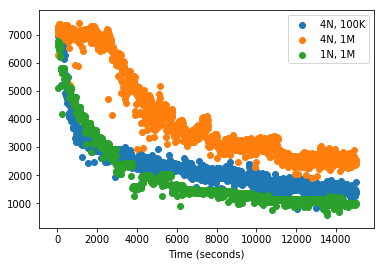

In [21]:
def untar(fname):
    try: shutil.rmtree("tmp")
    except: pass
    os.mkdir("tmp")
    tar = tarfile.open(fname)
    tar.extractall()
    tar.close()
    
def plot_keyspace(ax, op, results, rank="1", label=""):
    fname = ""
    untar(results + "/out/perf.tar.gz")
    shutil.move("perf/perf." + rank, "tmp/perf." + rank)
    fname = "tmp/perf." + rank
    df = pd.read_csv(fname, names=['ts', 'op', 'count'])
    
    df = df[df['op'] == op]
    shift = np.min(df['ts']) * np.ones(len(df['ts']))
    
    df['cs'] = df['count'].astype(float) - df['count'].shift(1).astype(float)
    ax.scatter(df['ts'].astype(float) - shift, df['cs'].astype(float), label=label)
    ax.set_xlabel("Time (seconds)")
    ax.legend()
    
fig, ax = plt.subplots(1, 1)
d = "../experiments/baseline-trinitite/"
plot_keyspace(ax, "DBMemoryGet", d+"nano-sepminima/scale-keyspace-trace/scale-workers-4-71541/", label="4N, 100K")
plot_keyspace(ax, "DBMemoryGet", d+"nano-sepminima/scale-keyspace-trace/scale-workers-1M-4-71537/", label="4N, 1M")
plot_keyspace(ax, "DBMemoryGet", d+"nano-sepminima/scale-keyspace-trace/scale-workers-1M-1-71684", label="1N, 1M")


In [32]:
from sklearn.cluster import KMeans

df = pd.read_csv("./data_1024.csv", sep='\t')

### For the purposes of this example, we store feature data from our
### dataframe `df`, in the `f1` and `f2` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.
f1 = df['Distance_Feature'].values
f2 = df['Speeding_Feature'].values

X=np.matrix(zip(f1,f2))
kmeans = KMeans(n_clusters=2).fit(X)
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)